In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

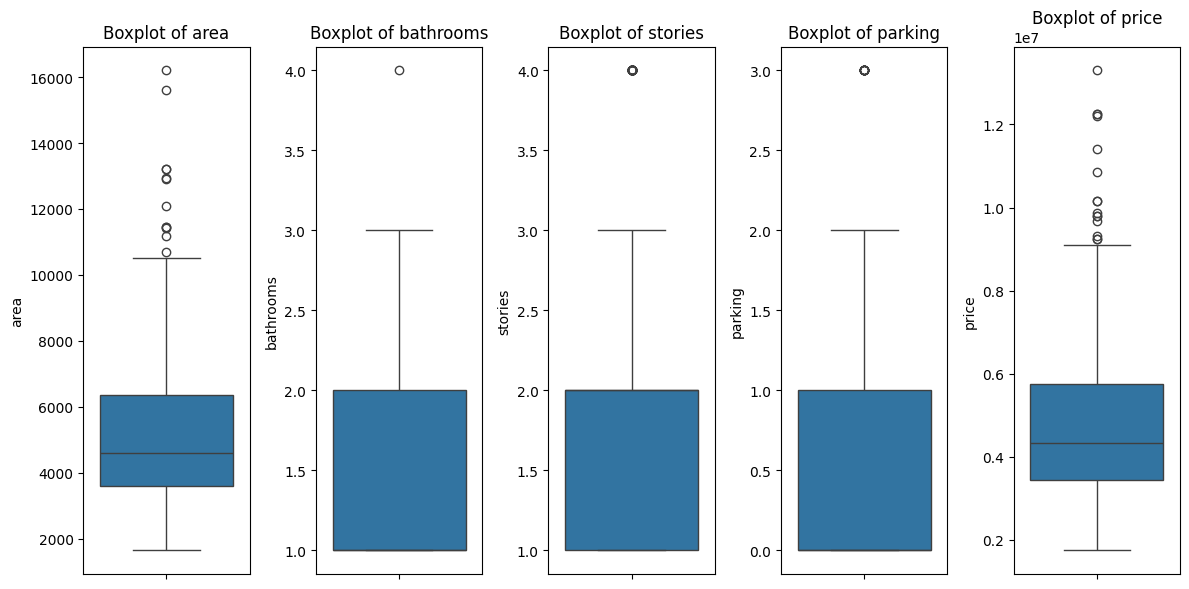

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ['area', 'bathrooms', 'stories', 'parking', 'price']

# Plot boxplots for each numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# Preprocessing

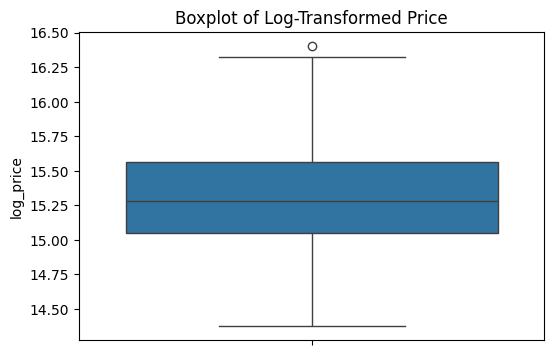

In [7]:
# Apply log transformation to the target variable
df['log_price'] = np.log(df['price'])

# Replot the boxplot for log-transformed price
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['log_price'])
plt.title('Boxplot of Log-Transformed Price')
plt.show()

In [8]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


# Apply Label Encoding for categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selected features
selected_features = ['area', 'bathrooms', 'stories', 'airconditioning', 'parking', 'prefarea']

# Separate features (X) and target variable (y)
X = df[selected_features]
y = df['price']

# Apply Robust Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

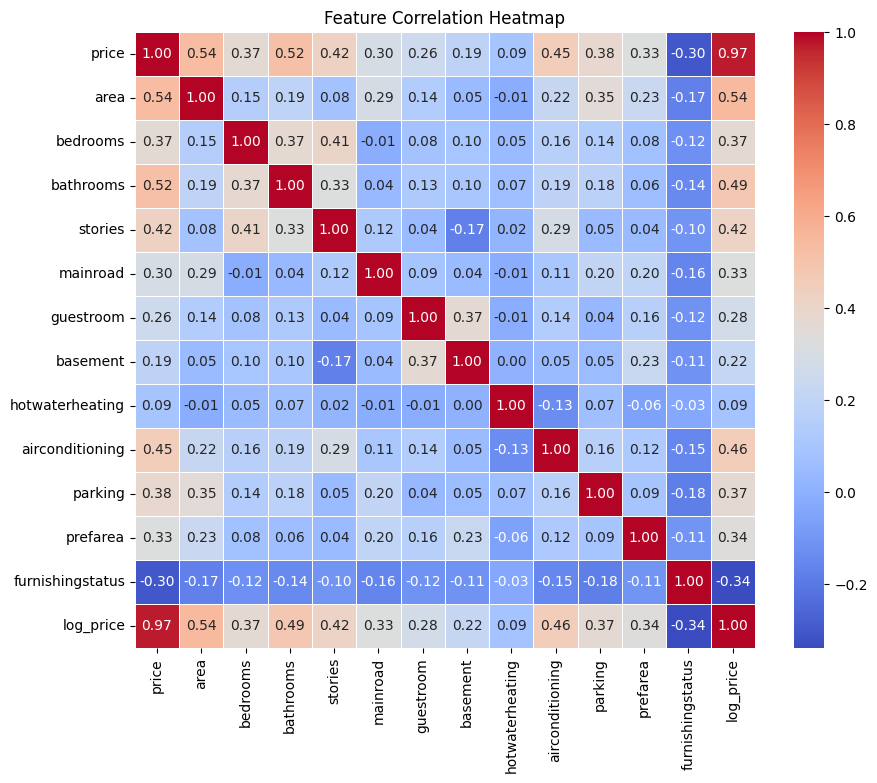

In [9]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()


# Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.28e-92
Time:                        15:44:34   Log-Likelihood:                -6663.3
No. Observations:                 436   AIC:                         1.334e+04
Df Residuals:                     429   BIC:                         1.337e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.687e+06   8.21e+04     44.915      0.0

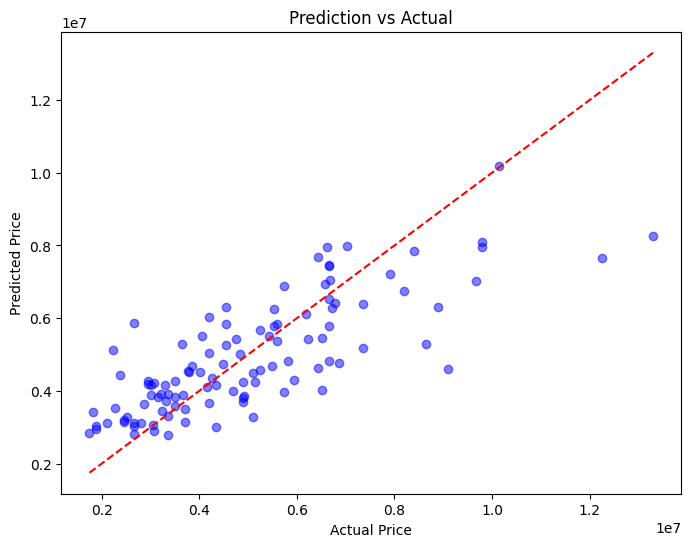

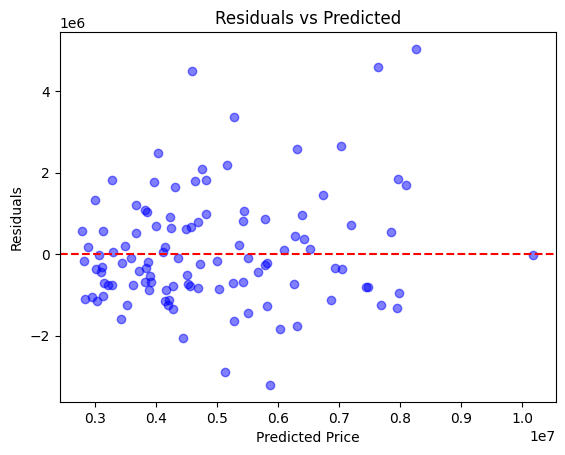

           Feature        VIF
0            const  13.171767
1             area   1.247228
2        bathrooms   1.175727
3          stories   1.196939
4  airconditioning   1.160741
5          parking   1.166718
6         prefarea   1.063469


In [10]:

# Add constant for OLS model
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Model training
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

# Predictions
y_pred = model.predict(X_test_const)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

# VIF Calculation
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

X_const = sm.add_constant(X)  # VIF should be checked on unscaled data
vif_result = calculate_vif(X_const)
print(vif_result)


## Overview of the Process and Results:
We trained a linear regression model to predict house prices based on features like area, number of bedrooms, bathrooms, and other house attributes. The model uses past data to find relationships between these features and the price of the house.


---


**Key Results:**
*   R-squared (0.643): This means the model explains 64.3% of the variation in house prices. It’s a decent fit but could be improved with additional features.
house prices. It’s a decent fit but could be better.
*   P-values:Some features, like area, bathrooms, and stories, are important predictors of price. Others, like guestroom, might not be as significant.

*   For each unit increase in area, the price increases by 702,600.
More bedrooms, bathrooms, parking spaces, or stories also increase the price significantly.


**Model Evaluation:**
*   MAE (921,450.32): On average, the model’s predictions are off by about 921,450. Lower values indicate better accuracy.
*   RMSE (1.33e+06): The root mean squared error shows that typical errors are around 1.33 million, highlighting some large deviations.
*   R-squared Score on Test Data (0.649): The model explains 64.9% of price variance in unseen data, slightly lower than the training R², indicating mild overfitting.



**Visualizations:**
*   Prediction vs Actual: We plotted the predicted prices against actual prices. The closer the points are to the red line, the better the predictions.
*  Residuals vs Predicted: This shows how well the model’s errors (residuals) match up with predictions. The more random the errors, the better.


**Conclusion:**
The model works reasonably well, explaining a good portion of the price variation. However, it could be improved with more data or a different model.
The error metrics (MAE and MSE) show that the predictions could be more accurate.

## REFERENCE
[Ashish]. (2019). [Housing Dataset], [Version 1], https://www.kaggle.com/datasets/ashydv/housing-dataset